#**TASK 1**




#Imported Libraries


In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

#Load dataset

In [86]:
df = pd.read_csv("/content/student-performance-factors/StudentPerformanceFactors.csv")


#Explore the dataset

In [87]:
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
#print(df.isnull().sum())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

#Basic visualization

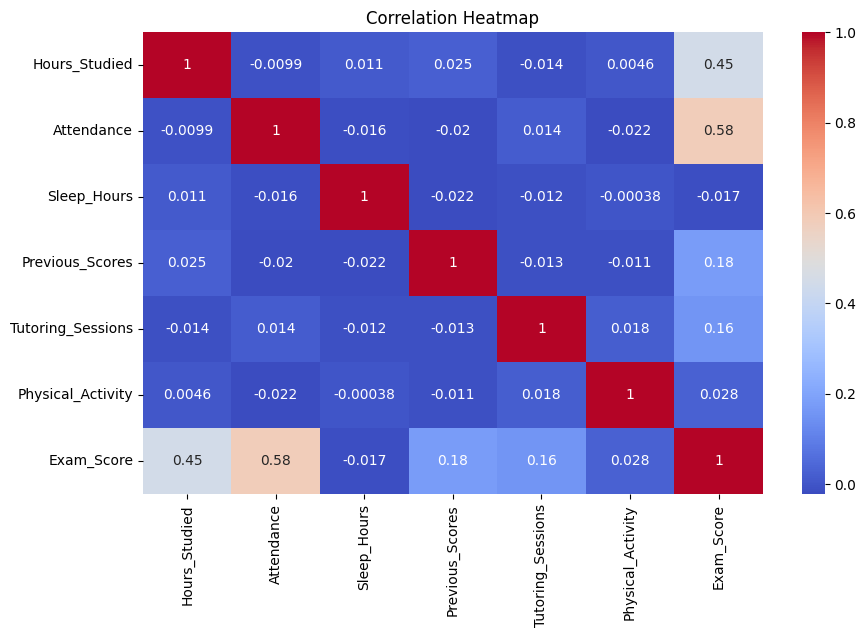

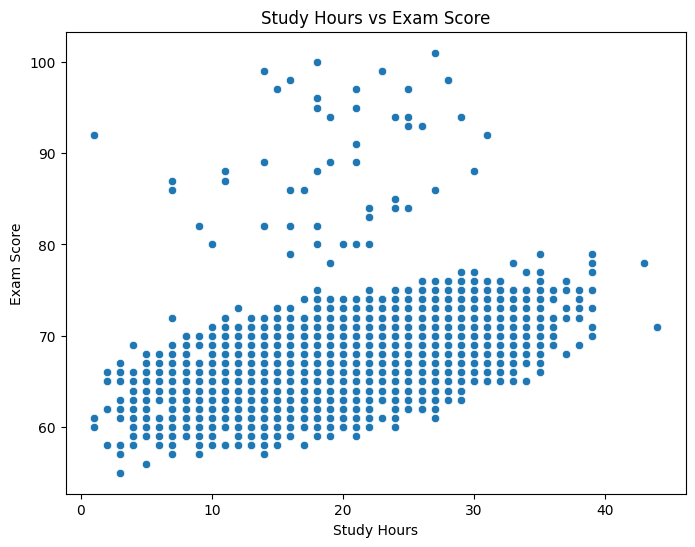

In [88]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Relationship between study hours and exam score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Hours_Studied"], y=df["Exam_Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()


#Prepare Data

In [89]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

#One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

#Scale features

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)

X_train shape: (4624, 27)


#Build neural network

In [91]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # regression output (no activation)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#compile model

In [92]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


#Train Model

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop training when validation loss does not improve for 10 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4158.5103 - mae: 64.2245 - val_loss: 1661.5024 - val_mae: 40.3113
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 806.3234 - mae: 25.1259 - val_loss: 40.0072 - val_mae: 4.8435
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4556 - mae: 4.4934 - val_loss: 28.7652 - val_mae: 3.9748
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24.7408 - mae: 3.8474 - val_loss: 24.2238 - val_mae: 3.5264
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2915 - mae: 3.4090 - val_loss: 21.5126 - val_mae: 3.2453
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5474 - mae: 3.1051 - val_loss: 19.2248 - val_mae: 2.9909
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.3677 - mae: 2.8373 - val_loss: 17.6119 - val_mae: 2.8101
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.1099 - mae: 2.6109 - val_loss: 16.2771 - val_mae: 2.6531
Epoch 9/100
116/116 ━━━

#Plot training history

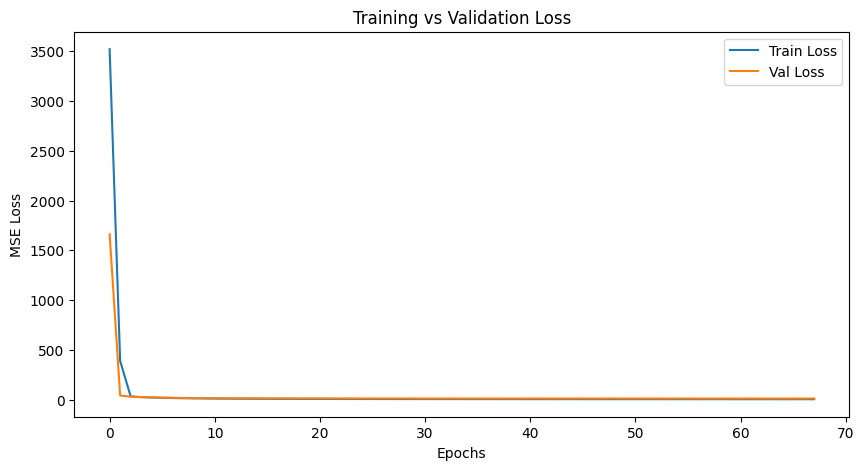

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

#Make Predictions


In [95]:
y_pred = model.predict(X_test)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


#Evaluate Model

In [96]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)
print("RMSE:", rmse)
print("R² Score:", r2)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Loss (MSE): 6.935577392578125
Test MAE: 1.593932032585144
RMSE: 2.633548441281862
R² Score: 0.5378698110580444


#Visualization of Predictions

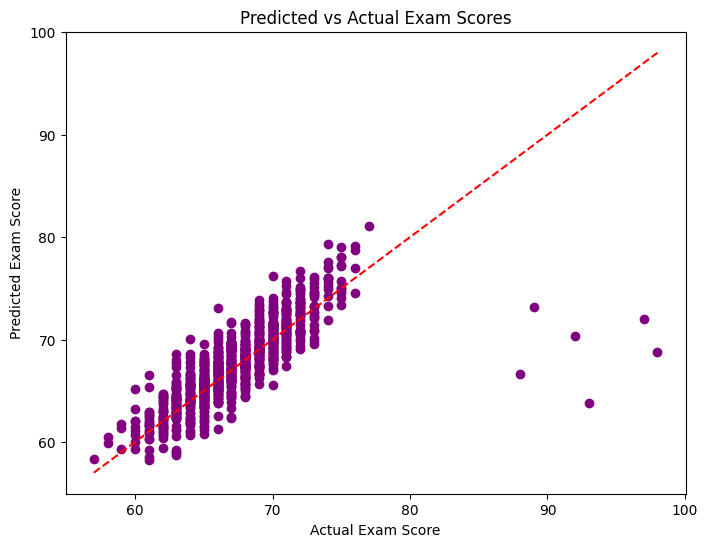

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()
